# **Exercici 1**
Crea almenys tres models de regressió diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv.

Load the dataset

In [1]:
# import libraries
import numpy as np
import pandas as pd

from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [2]:
# Load the dataframe
df=pd.read_csv ("data/DelayedFlights.csv")
#Remove the column ' Unnamed: 0'
df.drop('Unnamed: 0', axis=1, inplace=True)
# fill 0 if we don´t have data
df[['DepDelay',"ArrDelay"]]=df[['DepDelay',"ArrDelay"]].fillna(0)

df=df[['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'ArrTime', 'UniqueCarrier', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance']]

df.head()

,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance
0,1,3,4,2003.0,2211.0,WN,116.0,-14.0,8.0,IAD,TPA,810
1,1,3,4,754.0,1002.0,WN,113.0,2.0,19.0,IAD,TPA,810
2,1,3,4,628.0,804.0,WN,76.0,14.0,8.0,IND,BWI,515
3,1,3,4,1829.0,1959.0,WN,77.0,34.0,34.0,IND,BWI,515
4,1,3,4,1940.0,2121.0,WN,87.0,11.0,25.0,IND,JAX,688


In [3]:
#Data Transforming
le = preprocessing.LabelEncoder()

df_cat = df[['UniqueCarrier','Origin', 'Dest' ]]
df_cat.head()

,UniqueCarrier,Origin,Dest
0,WN,IAD,TPA
1,WN,IAD,TPA
2,WN,IND,BWI
3,WN,IND,BWI
4,WN,IND,JAX


In [4]:
df_transform = df.copy()

for col in df_cat:
    df_transform[col] = le.fit_transform(df_cat[col])

    
df_transform.head()

,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance
0,1,3,4,2003.0,2211.0,17,116.0,-14.0,8.0,135,286,810
1,1,3,4,754.0,1002.0,17,113.0,2.0,19.0,135,286,810
2,1,3,4,628.0,804.0,17,76.0,14.0,8.0,140,48,515
3,1,3,4,1829.0,1959.0,17,77.0,34.0,34.0,140,48,515
4,1,3,4,1940.0,2121.0,17,87.0,11.0,25.0,140,150,688


Correlation

Let's check the features that better met with the target.

For this case, lets use the correlation (Pearson's) between the ArrDelay target and the other attributes.

In [5]:
# using the corr() method
corr_matrix = df_transform.corr()

# How much each attribute correlates with the Arrival Delay
corr_matrix['ArrDelay'].sort_values(ascending=False)

ArrDelay         1.000000
DepDelay         0.946002
DepTime          0.126764
DayOfWeek        0.006166
DayofMonth       0.003996
AirTime         -0.000189
Month           -0.001585
Origin          -0.001753
Dest            -0.014735
Distance        -0.030672
UniqueCarrier   -0.036913
ArrTime         -0.050767
Name: ArrDelay, dtype: float64

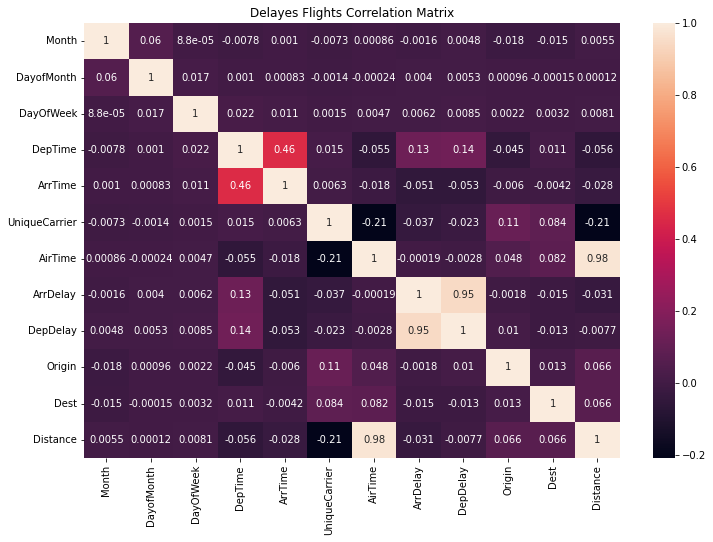

In [6]:
# Matrix correlation
plt.figure(figsize=(12,8))

sns.heatmap(corr_matrix, annot=True)
plt.title('Delayes Flights Correlation Matrix')
plt.show()

In [11]:
df_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 12 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Month          int64  
 1   DayofMonth     int64  
 2   DayOfWeek      int64  
 3   DepTime        float64
 4   ArrTime        float64
 5   UniqueCarrier  int32  
 6   AirTime        float64
 7   ArrDelay       float64
 8   DepDelay       float64
 9   Origin         int32  
 10  Dest           int32  
 11  Distance       int64  
dtypes: float64(5), int32(3), int64(4)
memory usage: 155.2 MB


**Linear Regression**

Fit a linear regression model using the DepDelay feature, which have the biggest correlation coefficient


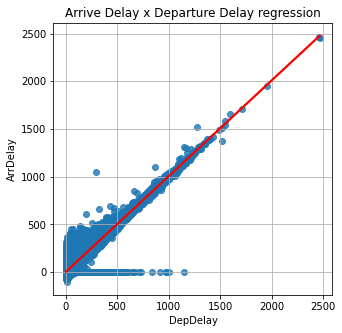

In [16]:
plt.figure(figsize=(5,5))
plt.grid()
sns.regplot(x="DepDelay", y="ArrDelay", data=df_transform,line_kws={"color": "red"})
plt.title('Arrive Delay x Departure Delay regression');

In [31]:

x=np.array(df_transform['DepDelay']).reshape((-1,1))
y=np.array(df_transform['ArrDelay'])
model = LinearRegression().fit(x,y)

In [32]:
#obtain the coefficient of determination (𝑅²)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8949198002949562


In [33]:
y_pr = model.predict(x)
y_pr

array([ 6.65830465, 17.71259623,  6.65830465, ..., 79.01366773,
        9.67311145,  5.65336905])

In [54]:
MSE = np.square(np.subtract(y_pr,y)).mean()
MSE

338.1708936518837

**Multiple linear regression**

I choose the features most correlated with the ArrDelay and no repetitive 


In [29]:

x_m=df_transform[['DepDelay', 'UniqueCarrier','Distance']]
y_m=np.array(df['ArrDelay'])
model_m = LinearRegression().fit(x_m,y_m)

In [35]:
#obtain the coefficient of determination (𝑅²)
r_sq_m = model_m.score(x_m, y_m)
print('coefficient of determination:', r_sq_m)

coefficient of determination: 0.8958764714800674


In [37]:
y_pr_m = model_m.predict(x_m)
y_pr_m

array([ 5.39849161, 16.44465251,  6.20571348, ..., 80.21081076,
       11.34812589,  6.39824636])

In [56]:
MSE_m = np.square(np.subtract(y_pr_m,y_m)).mean()
MSE_m

335.09211810227316

**Ridge regression**

In [49]:
from sklearn.linear_model import Ridge
model_ridge=Ridge().fit(x_m, y_m)
r_sq_ridge = model_ridge.score(x_m, y_m)
r_sq_ridge

0.8958764714800675

In [50]:
y_ridge=model_ridge.predict(x_m)
MSE_ridge = np.square(np.subtract(y_ridge,y_m)).mean()
MSE_ridge

335.0921181022728

**Decision Tree Regression**

In [52]:
from sklearn.tree import DecisionTreeRegressor
model_tree=DecisionTreeRegressor(random_state=0).fit(x_m, y_m)
r_sq_tree = model_tree.score(x_m, y_m)
r_sq_tree

0.9309157006466928

In [53]:
y_tree=model_tree.predict(x_m)
MSE_tree = np.square(np.subtract(y_tree,y_m)).mean()
MSE_tree

222.32827226441543

# - Exercici 2
Compara’ls en base al MSE i al R2 .

In [57]:
measure_eval = pd.DataFrame({'Measure': ['R2', 'MSE'], 
                             'Lin_Reg': [r_sq, MSE],
                             'Mult_Lin_Reg':[r_sq_m,MSE_m],
                             'Ridge_Reg': [r_sq_ridge,MSE_ridge], 
                             'Decision_Tree': [r_sq_tree,MSE_tree]
                            })
measure_eval

,Measure,Lin_Reg,Mult_Lin_Reg,Ridge_Reg,Decision_Tree
0,R2,0.894920,0.895876,0.895876,0.930916
1,MSE,338.170894,335.092118,335.092118,222.328272


# - Exercici 3
Entrena’ls utilitzant els diferents paràmetres que admeten.

The term Alfa is a hyperparameter Let's import GridSearchCV from the module model_selection.

In [191]:
from sklearn.model_selection import GridSearchCV

#create a dictionary of parameters values
parameters= {'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}
parameters

{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}

In [192]:
# Create a Ridge  region object
RR=Ridge()

#Create a ridge grid search object
Grid = GridSearchCV(RR, parameters,cv=4)

In [193]:
from sklearn.model_selection import train_test_split

x_m=df_transform[['DepDelay', 'UniqueCarrier','Distance']]
y_m=np.array(df['ArrDelay'])

X_train, X_test, y_train, y_test = train_test_split(x_m, y_m, test_size=0.35, random_state=1)

#Fit the model
Grid.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=parameters)



GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                   100000]})

In [194]:
#Obtain the estimator with the best parameters 
BestRR=Grid.best_estimator_
BestRR

Ridge(alpha=0.001)

In [195]:
#test our model on the test data
BestRR.score(X_test, y_test)

0.8967781743343735

# - Exercici 4
Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (validació interna)

I'll use the Multiple Linear Regression as a example, using train/test instead of all data.

**Multiple Linear Regression- Using train/test data**


In [61]:
#x_m=df_transform[['DepDelay', 'UniqueCarrier','Distance']]
#y_m=np.array(df['ArrDelay'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_m, y_m, test_size=0.30, random_state=1)

print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

model_train = LinearRegression().fit(X_train,y_train)

number of test samples : 581028
number of training samples: 1355730


In [62]:
#obtain the coefficient of determination (𝑅²)
r_sq_test = model_m.score(X_test, y_test)
print('coefficient of determination:', r_sq_test)

coefficient of determination: 0.8966620798060537


In [66]:
y_pr_ = model_train.predict(X_test)
y_pr_

array([10.76117804,  6.97443378, 48.25575731, ...,  6.45092726,
        8.80868768, 18.03679981])

In [67]:
MSE_ = np.square(np.subtract(y_pr_,y_test)).mean()
MSE_

333.93838829757266

# - Exercici 5
Realitza algun procés d’enginyeria de variables per millorar-ne la predicció

In [145]:
corr_matrix = df_transform.corr()
# How much each attribute correlates with the Arrival Delay
corr_matrix['ArrDelay'].sort_values(ascending=False)

ArrDelay         1.000000
DepDelay         0.946002
DepTime          0.126764
DayOfWeek        0.006166
DayofMonth       0.003996
AirTime         -0.000189
Month           -0.001585
Origin          -0.001753
Dest            -0.014735
Distance        -0.030672
UniqueCarrier   -0.036913
ArrTime         -0.050767
Name: ArrDelay, dtype: float64

Let's create a attribute "day/night" to see if time of the departure influences the flight delay.

In [147]:
# Create 'weekend' attribute
df_day = df_transform.copy()
df_day['dep_hour'] = df_day['DepTime'].apply(lambda x: x//100)
df_day.groupby("dep_hour").agg({"ArrDelay":np.mean,"DepDelay":np.mean})

,ArrDelay,DepDelay
dep_hour,,
0.0,108.253018,115.302108
1.0,145.735533,154.080874
2.0,181.754796,191.879900
3.0,205.655527,213.305913
4.0,134.985294,147.504902
5.0,24.358423,24.888441
6.0,19.265655,19.447798
7.0,25.822504,25.900131
8.0,29.057710,29.005791


In [154]:
# Create 'day/night' attribute
df_day['dep_day_night'] = df_day['DepTime'].apply(lambda x: 0 if x//100>4 and x//100<22 else 1)
df_day.head()

,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,dep_hour,dep_day_night
0,1,3,4,2003.0,2211.0,17,116.0,-14.0,8.0,135,286,810,20.0,0
1,1,3,4,754.0,1002.0,17,113.0,2.0,19.0,135,286,810,7.0,0
2,1,3,4,628.0,804.0,17,76.0,14.0,8.0,140,48,515,6.0,0
3,1,3,4,1829.0,1959.0,17,77.0,34.0,34.0,140,48,515,18.0,0
4,1,3,4,1940.0,2121.0,17,87.0,11.0,25.0,140,150,688,19.0,0


**New Correlation**

In [155]:
corr_matrix = df_day.corr()
# How much each attribute correlates with the Arrival Delay
corr_matrix['ArrDelay'].sort_values(ascending=False)

ArrDelay         1.000000
DepDelay         0.946002
dep_day_night    0.194835
DepTime          0.126764
dep_hour         0.126419
DayOfWeek        0.006166
DayofMonth       0.003996
AirTime         -0.000189
Month           -0.001585
Origin          -0.001753
Dest            -0.014735
Distance        -0.030672
UniqueCarrier   -0.036913
ArrTime         -0.050767
Name: ArrDelay, dtype: float64

In [156]:
corr_matrix = df_day.corr()
# How much each attribute correlates with the Arrival Delay
corr_matrix['DepDelay'].sort_values(ascending=False)

DepDelay         1.000000
ArrDelay         0.946002
dep_day_night    0.220482
DepTime          0.139254
dep_hour         0.138851
Origin           0.010357
DayOfWeek        0.008538
DayofMonth       0.005289
Month            0.004769
AirTime         -0.002753
Distance        -0.007718
Dest            -0.013073
UniqueCarrier   -0.023256
ArrTime         -0.053024
Name: DepDelay, dtype: float64

The attribute 'day/night' has a small and positive correlation with the target 'ArrDelay'.

That's confirm that in the night the arrive delays are a little bigger.

# **Exercici 6**
No utilitzis la variable DepDelay a l’hora de fer prediccions

**Multiple linear regression**

I choose the features most correlated with the ArrDelay and no repetitive 


In [68]:

x_m=df_transform[['UniqueCarrier','Distance']]
y_m=np.array(df['ArrDelay'])
model_m = LinearRegression().fit(x_m,y_m)

In [69]:
#obtain the coefficient of determination (𝑅²)
r_sq_m = model_m.score(x_m, y_m)
print('coefficient of determination:', r_sq_m)

coefficient of determination: 0.002903839408103015


In [70]:
y_pr_m = model_m.predict(x_m)
y_pr_m

array([39.29539385, 39.29539385, 40.46490784, ..., 44.53918035,
       45.1576352 , 43.80575632])

In [71]:
MSE_m = np.square(np.subtract(y_pr_m,y_m)).mean()
MSE_m

3208.8718962345015

**Ridge regression**

In [73]:
from sklearn.linear_model import Ridge
model_ridge=Ridge().fit(x_m, y_m)
r_sq_ridge = model_ridge.score(x_m, y_m)
r_sq_ridge

0.002903839408103015

In [74]:
y_ridge=model_ridge.predict(x_m)
MSE_ridge = np.square(np.subtract(y_ridge,y_m)).mean()
MSE_ridge

3208.8718962345015

**Decision Tree Regression**

In [75]:
from sklearn.tree import DecisionTreeRegressor
model_tree=DecisionTreeRegressor(random_state=0).fit(x_m, y_m)
r_sq_tree = model_tree.score(x_m, y_m)
r_sq_tree

0.042047706059620715

In [76]:
y_tree=model_tree.predict(x_m)
MSE_tree = np.square(np.subtract(y_tree,y_m)).mean()
MSE_tree

3082.8984359280826

In [77]:
measure_eval = pd.DataFrame({'Measure': ['R2', 'MSE'],                              
                             'Mult_Lin_Reg':[r_sq_m,MSE_m],
                             'Ridge_Reg': [r_sq_ridge,MSE_ridge], 
                             'Decision_Tree': [r_sq_tree,MSE_tree]
                            })
measure_eval

,Measure,Mult_Lin_Reg,Ridge_Reg,Decision_Tree
0,R2,0.002904,0.002904,0.042048
1,MSE,3208.871896,3208.871896,3082.898436
